In [125]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score
import warnings
warnings.filterwarnings('ignore')


Load Dataset


In [126]:
df=pd.read_csv('medical_insurance.csv')
df.head()

,person_id,age,sex,region,urban_rural,income,education,marital_status,employment_status,household_size,...,liver_disease,arthritis,mental_health,proc_imaging_count,proc_surgery_count,proc_physio_count,proc_consult_count,proc_lab_count,is_high_risk,had_major_procedure
0,75722,52,Female,North,Suburban,22700,Doctorate,Married,Retired,3,...,0,1,0,1,0,2,0,1,0,0
1,80185,79,Female,North,Urban,12800,No HS,Married,Employed,3,...,0,1,1,0,0,1,0,1,1,0
2,19865,68,Male,North,Rural,40700,HS,Married,Retired,5,...,0,0,1,1,0,2,1,0,1,0
3,76700,15,Male,North,Suburban,15600,Some College,Married,Self-employed,5,...,0,0,0,1,0,0,1,0,0,0
4,92992,53,Male,Central,Suburban,89600,Doctorate,Married,Self-employed,2,...,0,1,0,2,0,1,1,0,1,0


In [127]:
print(f"Dataset Shape: {df.shape}")
print(f"\nFirst Few Rows:")
print(df.head())
print(f"\nData Types:")
print(df.dtypes)
print(f"\nMissing Values:")
missing = df.isnull().sum()
print(missing[missing > 0] if missing.sum() > 0 else "No missing values")
print(f"\nBasic Statistics:")
print(df.describe())

Dataset Shape: (100000, 54)

First Few Rows:
   person_id  age     sex   region urban_rural  income     education  \
0      75722   52  Female    North    Suburban   22700     Doctorate   
1      80185   79  Female    North       Urban   12800         No HS   
2      19865   68    Male    North       Rural   40700            HS   
3      76700   15    Male    North    Suburban   15600  Some College   
4      92992   53    Male  Central    Suburban   89600     Doctorate   

  marital_status employment_status  household_size  ...  liver_disease  \
0        Married           Retired               3  ...              0   
1        Married          Employed               3  ...              0   
2        Married           Retired               5  ...              0   
3        Married     Self-employed               5  ...              0   
4        Married     Self-employed               2  ...              0   

   arthritis mental_health proc_imaging_count  proc_surgery_count  \
0       

Data Preprocessing


In [128]:
df.isnull().sum()


person_id                          0
age                                0
sex                                0
region                             0
urban_rural                        0
income                             0
education                          0
marital_status                     0
employment_status                  0
household_size                     0
dependents                         0
bmi                                0
smoker                             0
alcohol_freq                   30083
visits_last_year                   0
hospitalizations_last_3yrs         0
days_hospitalized_last_3yrs        0
medication_count                   0
systolic_bp                        0
diastolic_bp                       0
ldl                                0
hba1c                              0
plan_type                          0
network_tier                       0
deductible                         0
copay                              0
policy_term_years                  0
p

In [129]:
# ============================================================================
# 2. DATA PREPROCESSING
# ============================================================================
print("\n\n2. DATA PREPROCESSING")
print("-" * 80)

df_clean = df.copy()

# Handle missing values if any
if df_clean.isnull().sum().sum() > 0:
    print("Handling missing values...")
    df_clean = df_clean.fillna(df_clean.median(numeric_only=True))

print("Data cleaned and ready for analysis.")



2. DATA PREPROCESSING
--------------------------------------------------------------------------------
Handling missing values...
Data cleaned and ready for analysis.


In [130]:
# Fill null values in alcohol_freq with the mode (most frequent value)
mode_value = df['alcohol_freq'].mode()[0]
df['alcohol_freq'].fillna(mode_value, inplace=True)

print(f"Filled null values with: {mode_value}")
print(f"Remaining null values: {df['alcohol_freq'].isnull().sum()}")
print(f"\nUpdated value counts:")
print(df['alcohol_freq'].value_counts())

Filled null values with: Occasional
Remaining null values: 0

Updated value counts:
alcohol_freq
Occasional    75161
Weekly        19833
Daily          5006
Name: count, dtype: int64


In [131]:
# Verify no null values remain in the entire dataset
print("Total null values in dataset:")
null_check = df.isnull().sum()
print(f"Total: {null_check.sum()}")
print(f"\nDataset shape: {df.shape}")

Total null values in dataset:
Total: 0

Dataset shape: (100000, 54)
Total: 0

Dataset shape: (100000, 54)


##### check data types

In [132]:
# Data types check
print('\nData types:')
print(df.dtypes)

# Convert date columns if any were inferred (in our dataset there are no explicit date fields)
# If there were a date column, you may use pd.to_datetime(df['date_column'])

# For categorical features, ensure they are in the proper type
categorical_cols = ['sex', 'region', 'urban_rural', 'education', 'marital_status', 'employment_status', 'smoker', 'alcohol_freq', 'plan_type', 'network_tier']
for col in categorical_cols:
    if col in df.columns:
        df[col] = df[col].astype('category')

# Verify the changes
print('\nUpdated data types:')
print(df.dtypes)


Data types:
person_id                        int64
age                              int64
sex                             object
region                          object
urban_rural                     object
income                           int64
education                       object
marital_status                  object
employment_status               object
household_size                   int64
dependents                       int64
bmi                            float64
smoker                          object
alcohol_freq                    object
visits_last_year                 int64
hospitalizations_last_3yrs       int64
days_hospitalized_last_3yrs      int64
medication_count                 int64
systolic_bp                      int64
diastolic_bp                     int64
ldl                            float64
hba1c                          float64
plan_type                       object
network_tier                    object
deductible                       int64
copay       

### Exploratory Data Analysis (EDA)



3. EXPLORATORY DATA ANALYSIS
--------------------------------------------------------------------------------


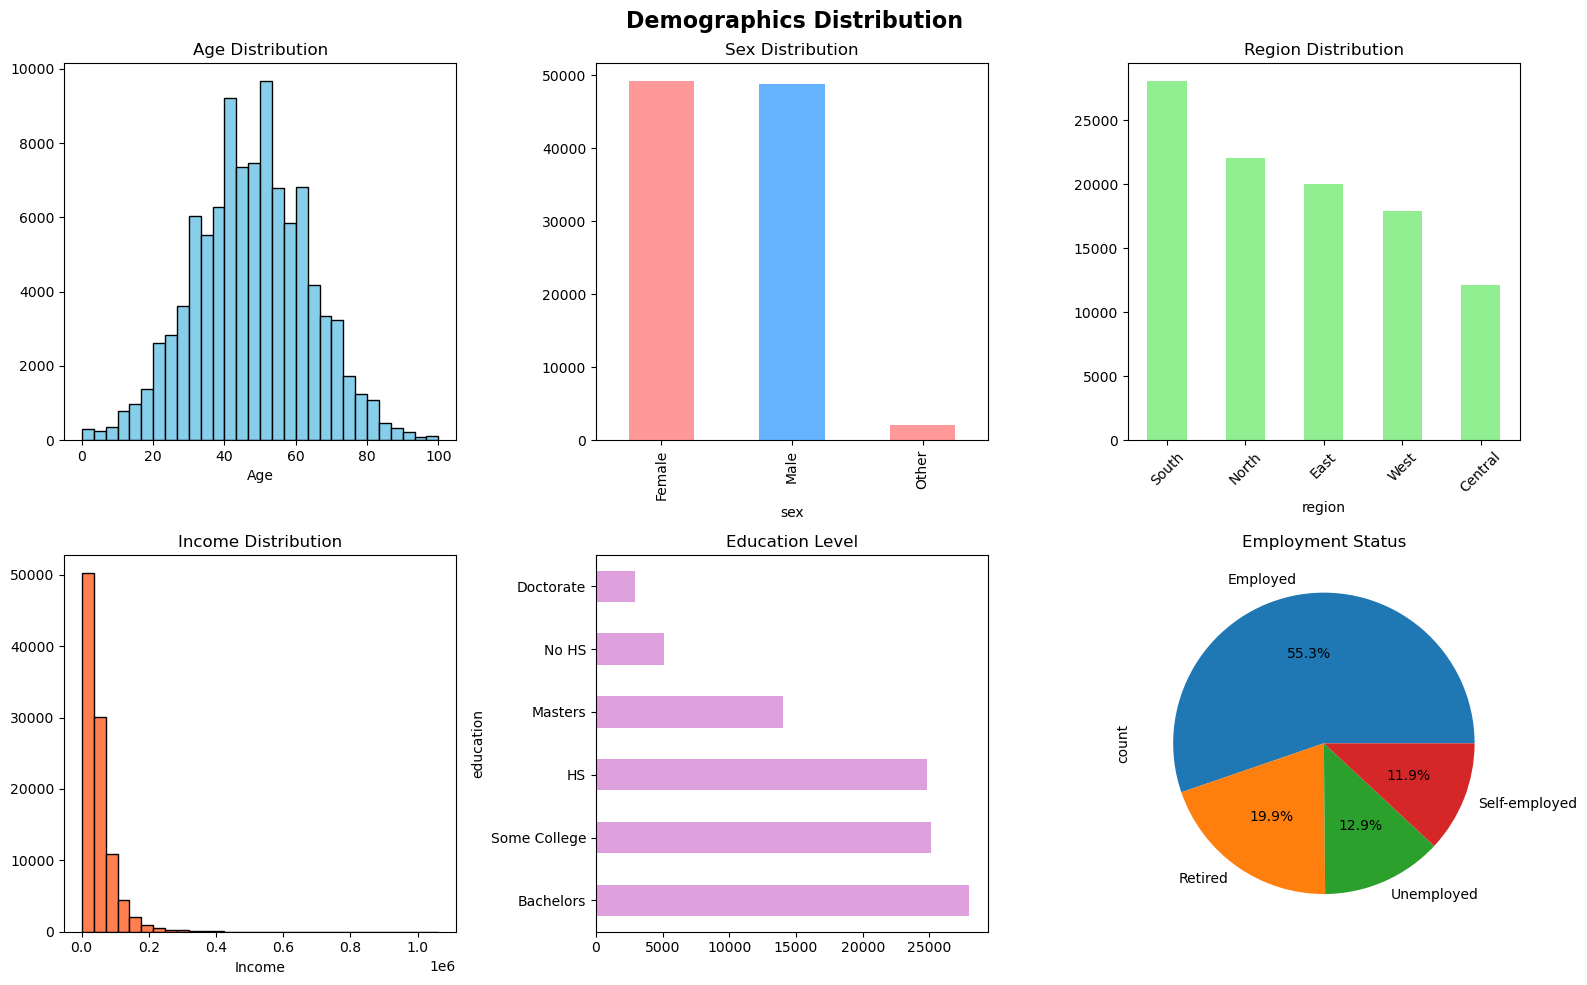

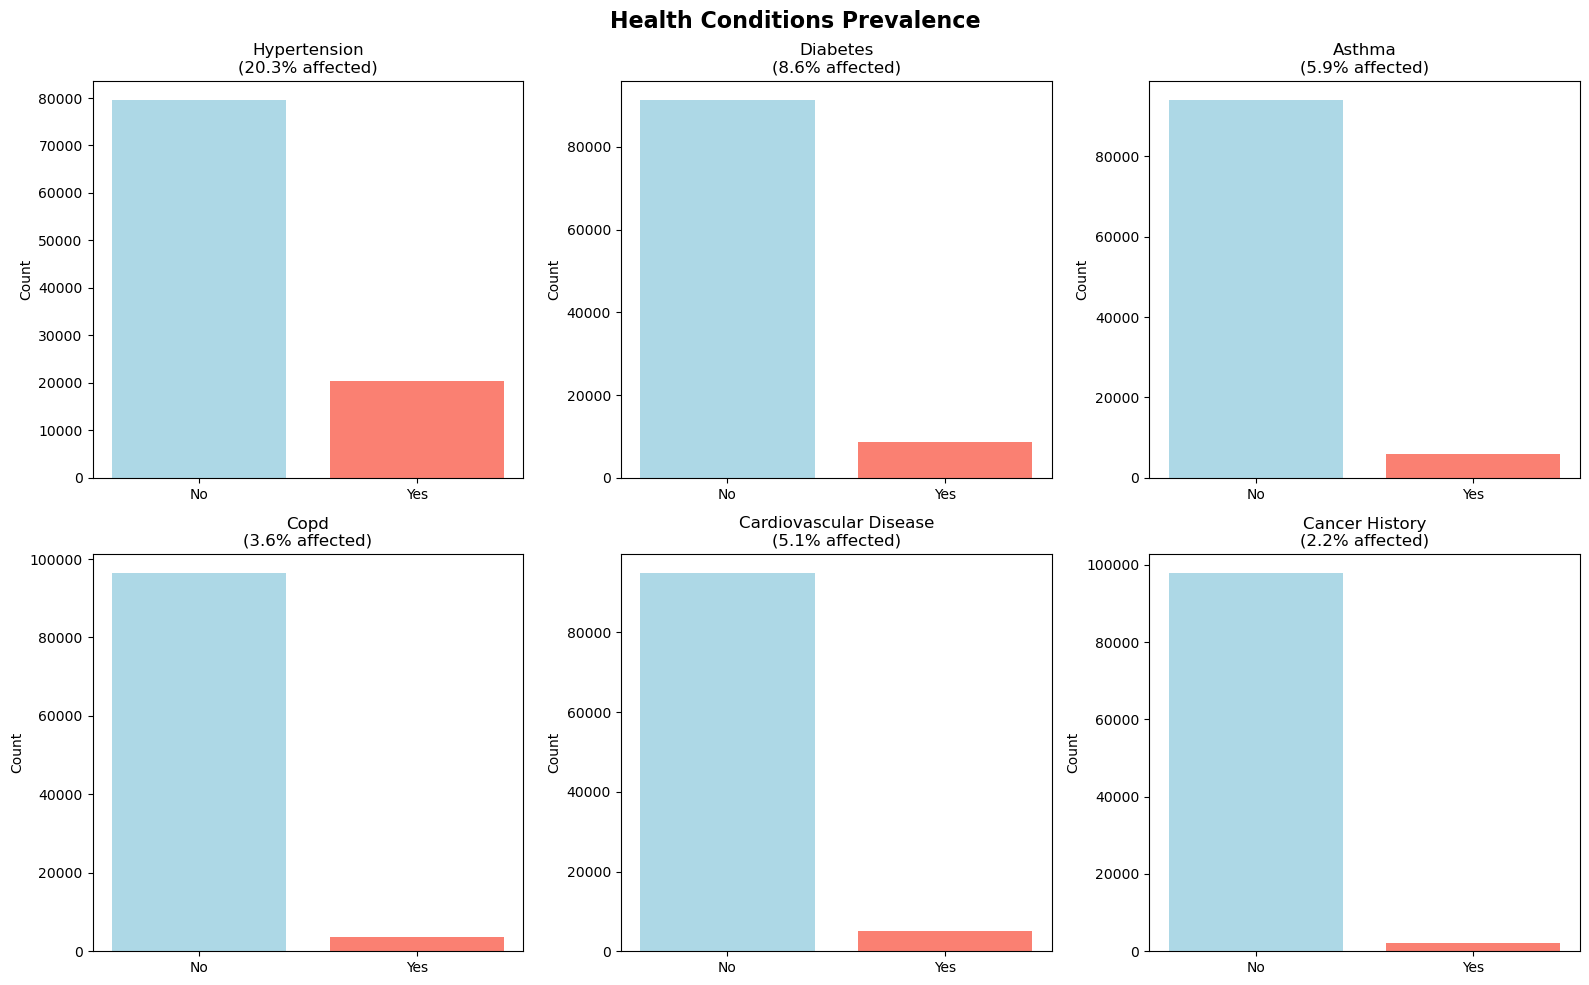

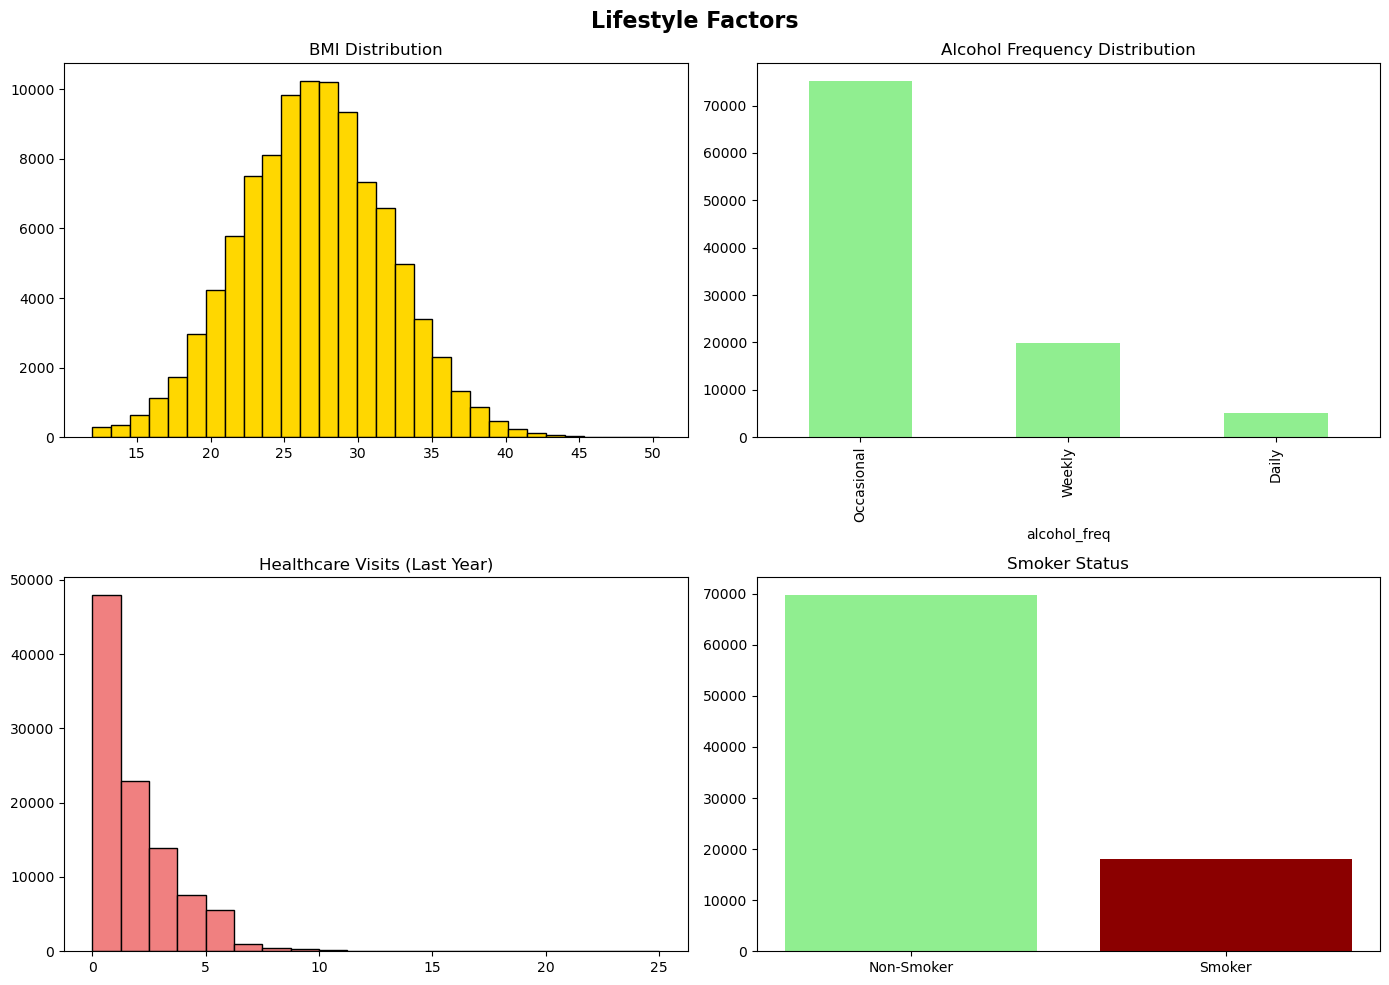

In [133]:
# ============================================================================
# 3. EXPLORATORY DATA ANALYSIS
# ============================================================================
print("\n\n3. EXPLORATORY DATA ANALYSIS")
print("-" * 80)

# Demographics Distribution
fig, axes = plt.subplots(2, 3, figsize=(16, 10))
fig.suptitle('Demographics Distribution', fontsize=16, fontweight='bold')

axes[0, 0].hist(df['age'], bins=30, color='skyblue', edgecolor='black')
axes[0, 0].set_title('Age Distribution')
axes[0, 0].set_xlabel('Age')

df['sex'].value_counts().plot(kind='bar', ax=axes[0, 1], color=['#ff9999', '#66b3ff'])
axes[0, 1].set_title('Sex Distribution')

df['region'].value_counts().plot(kind='bar', ax=axes[0, 2], color='lightgreen')
axes[0, 2].set_title('Region Distribution')
axes[0, 2].tick_params(axis='x', rotation=45)

axes[1, 0].hist(df['income'], bins=30, color='coral', edgecolor='black')
axes[1, 0].set_title('Income Distribution')
axes[1, 0].set_xlabel('Income')

df['education'].value_counts().plot(kind='barh', ax=axes[1, 1], color='plum')
axes[1, 1].set_title('Education Level')

df['employment_status'].value_counts().plot(kind='pie', ax=axes[1, 2], autopct='%1.1f%%')
axes[1, 2].set_title('Employment Status')

plt.tight_layout()
plt.show()

# Health Conditions
health_cols = ['hypertension', 'diabetes', 'asthma', 'copd', 'cardiovascular_disease', 'cancer_history']
fig, axes = plt.subplots(2, 3, figsize=(16, 10))
fig.suptitle('Health Conditions Prevalence', fontsize=16, fontweight='bold')

for idx, col in enumerate(health_cols):
    ax = axes[idx // 3, idx % 3]
    counts = df[col].value_counts()
    prevalence = (counts.get(1, 0) / len(df) * 100) if 1 in counts.index else 0
    ax.bar(['No', 'Yes'], [counts.get(0, 0), counts.get(1, 0)], color=['lightblue', 'salmon'])
    ax.set_title(f'{col.replace("_", " ").title()}\n({prevalence:.1f}% affected)')
    ax.set_ylabel('Count')

plt.tight_layout()
plt.show()

# Lifestyle Factors
fig, axes = plt.subplots(2, 2, figsize=(14, 10))
fig.suptitle('Lifestyle Factors', fontsize=16, fontweight='bold')

axes[0, 0].hist(df['bmi'], bins=30, color='gold', edgecolor='black')
axes[0, 0].set_title('BMI Distribution')

# Check if alcohol_freq is numeric or categorical
if df['alcohol_freq'].dtype == 'object':
    df['alcohol_freq'].value_counts().plot(kind='bar', ax=axes[0, 1], color='lightgreen')
    axes[0, 1].set_title('Alcohol Frequency Distribution')
else:
    df['alcohol_freq'].value_counts().plot(kind='bar', ax=axes[0, 1], color='lightgreen')
    axes[0, 1].set_title('Alcohol Frequency Distribution')

axes[1, 0].hist(df['visits_last_year'], bins=20, color='lightcoral', edgecolor='black')
axes[1, 0].set_title('Healthcare Visits (Last Year)')

smoker_counts = df['smoker'].value_counts()
axes[1, 1].bar(['Non-Smoker', 'Smoker'], [smoker_counts.get(0, 0), smoker_counts.get(1, 0)], 
               color=['lightgreen', 'darkred'])
axes[1, 1].set_title('Smoker Status')

plt.tight_layout()
plt.show()


4. MEDICAL COSTS ANALYSIS
--------------------------------------------------------------------------------
Annual Medical Cost Statistics:
  Mean: $3,009.45
  Median: $2,082.57
  Std Dev: $3,127.46
  Min: $55.55
  Max: $65,724.90


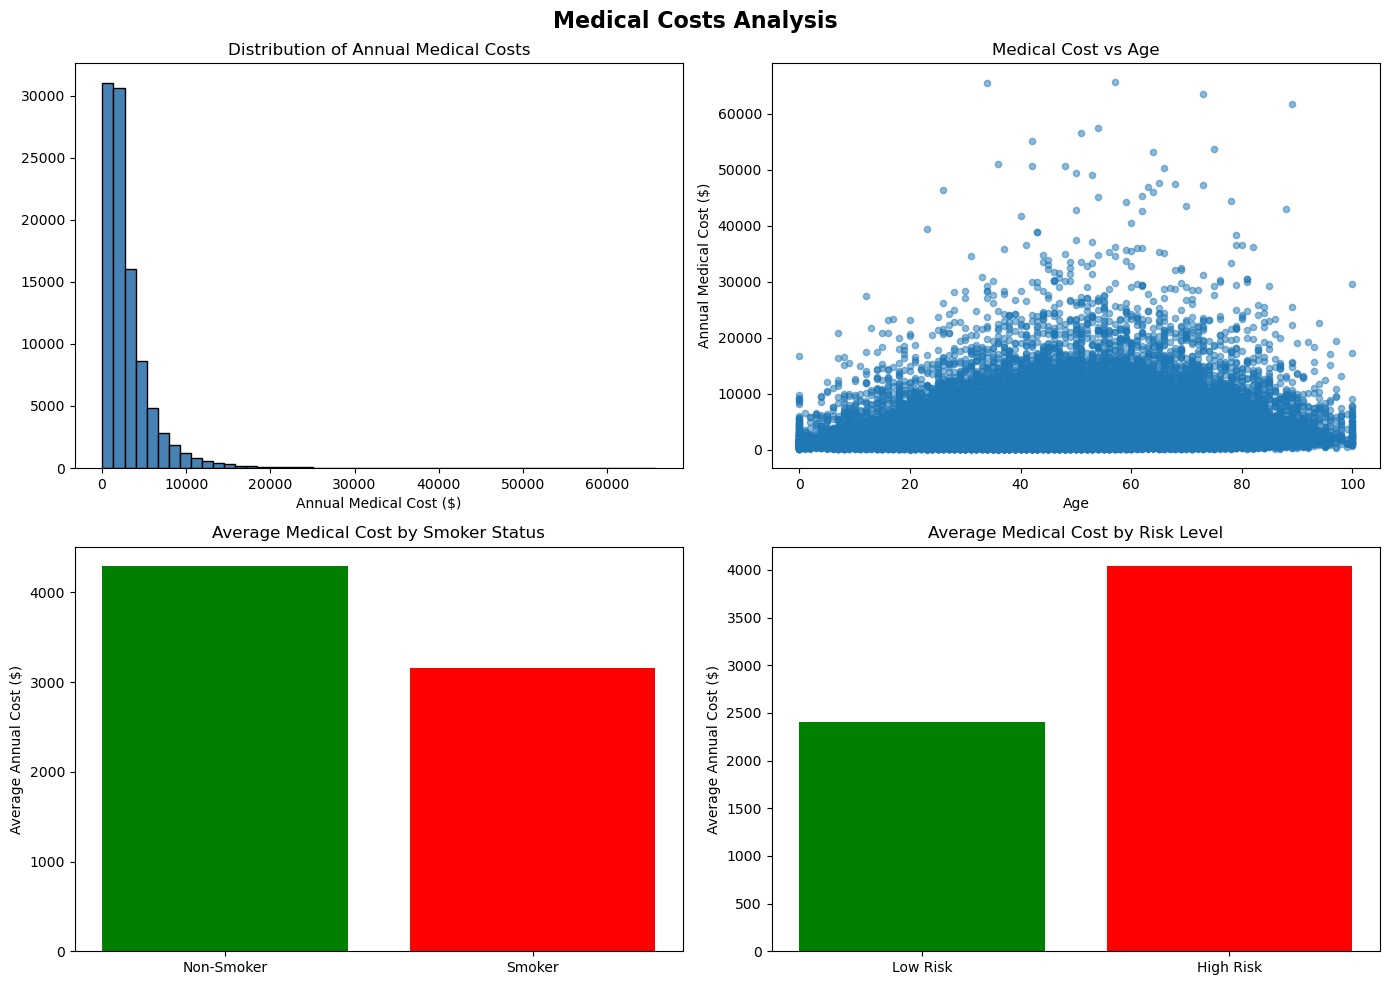

In [134]:
# ============================================================================
# 4. MEDICAL COSTS ANALYSIS
# ============================================================================
print("\n4. MEDICAL COSTS ANALYSIS")
print("-" * 80)

print(f"Annual Medical Cost Statistics:")
print(f"  Mean: ${df['annual_medical_cost'].mean():,.2f}")
print(f"  Median: ${df['annual_medical_cost'].median():,.2f}")
print(f"  Std Dev: ${df['annual_medical_cost'].std():,.2f}")
print(f"  Min: ${df['annual_medical_cost'].min():,.2f}")
print(f"  Max: ${df['annual_medical_cost'].max():,.2f}")

fig, axes = plt.subplots(2, 2, figsize=(14, 10))
fig.suptitle('Medical Costs Analysis', fontsize=16, fontweight='bold')

axes[0, 0].hist(df['annual_medical_cost'], bins=50, color='steelblue', edgecolor='black')
axes[0, 0].set_title('Distribution of Annual Medical Costs')
axes[0, 0].set_xlabel('Annual Medical Cost ($)')

# Cost by Age
axes[0, 1].scatter(df['age'], df['annual_medical_cost'], alpha=0.5, s=20)
axes[0, 1].set_title('Medical Cost vs Age')
axes[0, 1].set_xlabel('Age')
axes[0, 1].set_ylabel('Annual Medical Cost ($)')

# Cost by Smoker Status
smoker_cost = df.groupby('smoker')['annual_medical_cost'].mean()
axes[1, 0].bar(['Non-Smoker', 'Smoker'], [smoker_cost.get(0, 0), smoker_cost.get(1, 0)], 
               color=['green', 'red'])
axes[1, 0].set_title('Average Medical Cost by Smoker Status')
axes[1, 0].set_ylabel('Average Annual Cost ($)')

# Cost by Risk Level
risk_cost = df.groupby('is_high_risk')['annual_medical_cost'].mean()
axes[1, 1].bar(['Low Risk', 'High Risk'], [risk_cost.get(0, 0), risk_cost.get(1, 0)], 
               color=['green', 'red'])
axes[1, 1].set_title('Average Medical Cost by Risk Level')
axes[1, 1].set_ylabel('Average Annual Cost ($)')

plt.tight_layout()
plt.show()


5. CORRELATION ANALYSIS
--------------------------------------------------------------------------------
Top 15 Features Correlated with Annual Medical Cost:
annual_medical_cost            1.000000
monthly_premium                0.965416
annual_premium                 0.965415
total_claims_paid              0.739402
avg_claim_amount               0.632996
risk_score                     0.305971
chronic_count                  0.296720
is_high_risk                   0.251923
days_hospitalized_last_3yrs    0.230246
hospitalizations_last_3yrs     0.208640
visits_last_year               0.195631
claims_count                   0.179082
hypertension                   0.154309
had_major_procedure            0.148292
systolic_bp                    0.145070
Name: annual_medical_cost, dtype: float64


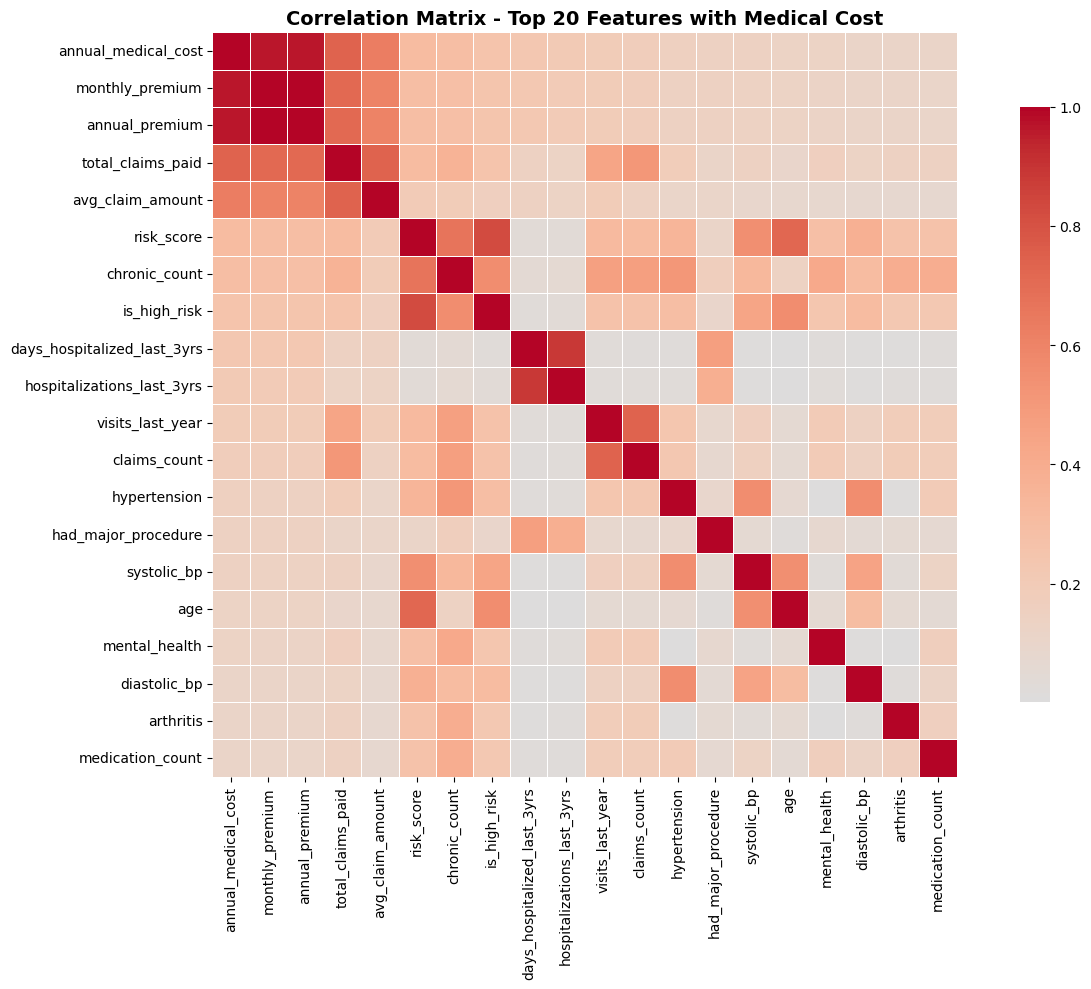

In [135]:
# ============================================================================
# 5. CORRELATION ANALYSIS
# ============================================================================
print("\n5. CORRELATION ANALYSIS")
print("-" * 80)

numeric_cols = df.select_dtypes(include=[np.number]).columns
correlation_matrix = df[numeric_cols].corr()

# Top correlations with medical cost
cost_corr = correlation_matrix['annual_medical_cost'].sort_values(ascending=False)
print("Top 15 Features Correlated with Annual Medical Cost:")
print(cost_corr.head(15))

# Correlation heatmap
plt.figure(figsize=(14, 10))
# Select top 20 correlated features for cleaner visualization
top_features = cost_corr.abs().nlargest(20).index
heatmap_data = df[top_features].corr()
sns.heatmap(heatmap_data, cmap='coolwarm', center=0, square=True, linewidths=0.5, cbar_kws={"shrink": 0.8})
plt.title('Correlation Matrix - Top 20 Features with Medical Cost', fontsize=14, fontweight='bold')
plt.tight_layout()
plt.show()


6. CHRONIC DISEASE & PROCEDURE ANALYSIS
--------------------------------------------------------------------------------

Chronic Disease Count Statistics:
count    100000.000000
mean          0.724720
std           0.805523
min           0.000000
25%           0.000000
50%           1.000000
75%           1.000000
max           6.000000
Name: chronic_count, dtype: float64


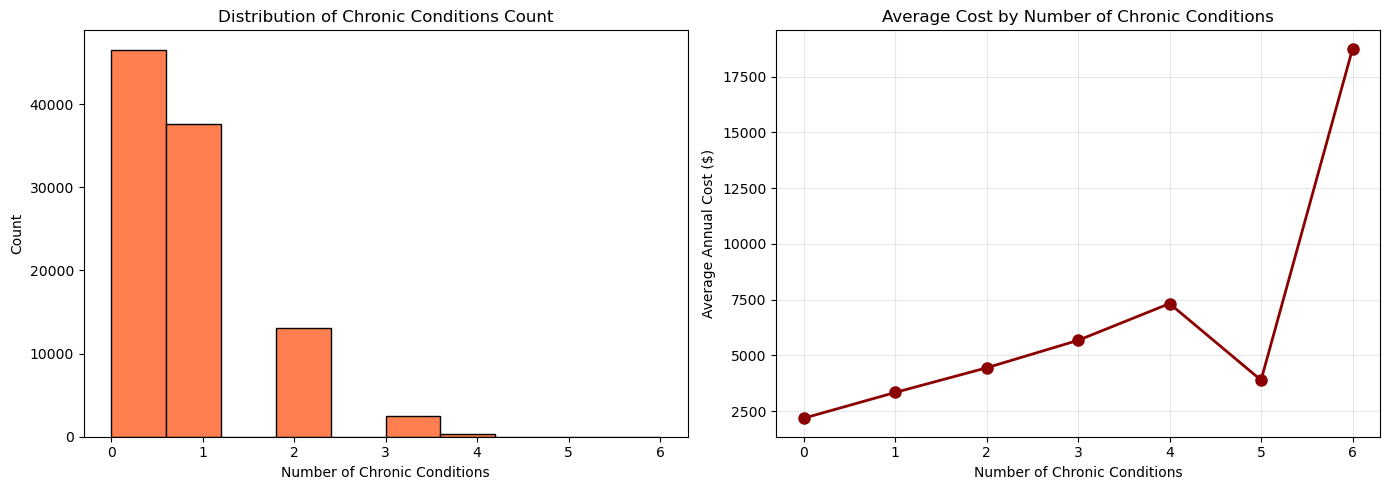

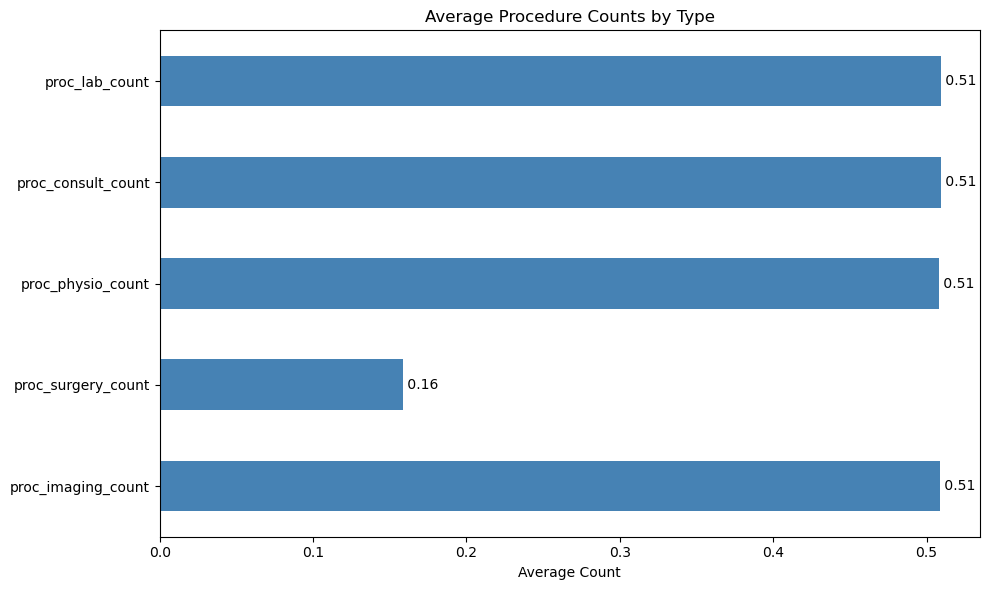

In [136]:
# ============================================================================
# 6. CHRONIC DISEASE & PROCEDURE ANALYSIS
# ============================================================================
print("\n6. CHRONIC DISEASE & PROCEDURE ANALYSIS")
print("-" * 80)

print(f"\nChronic Disease Count Statistics:")
print(df['chronic_count'].describe())

fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Chronic count distribution
axes[0].hist(df['chronic_count'], bins=10, color='coral', edgecolor='black')
axes[0].set_title('Distribution of Chronic Conditions Count')
axes[0].set_xlabel('Number of Chronic Conditions')
axes[0].set_ylabel('Count')

# Cost by chronic count
chronic_cost = df.groupby('chronic_count')['annual_medical_cost'].mean()
axes[1].plot(chronic_cost.index, chronic_cost.values, marker='o', linewidth=2, markersize=8, color='darkred')
axes[1].set_title('Average Cost by Number of Chronic Conditions')
axes[1].set_xlabel('Number of Chronic Conditions')
axes[1].set_ylabel('Average Annual Cost ($)')
axes[1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# Procedures analysis
proc_cols = ['proc_imaging_count', 'proc_surgery_count', 'proc_physio_count', 'proc_consult_count', 'proc_lab_count']
proc_avg = df[proc_cols].mean()

fig, ax = plt.subplots(figsize=(10, 6))
proc_avg.plot(kind='barh', ax=ax, color='steelblue')
ax.set_title('Average Procedure Counts by Type')
ax.set_xlabel('Average Count')
for i, v in enumerate(proc_avg):
    ax.text(v, i, f' {v:.2f}', va='center')

plt.tight_layout()
plt.show()

In [ ]:
# ============================================================================
# 7. PREDICTION TASK 1: REGRESSION (Predicting Annual Medical Costs)
# ============================================================================
print("\n\n7. REGRESSION MODELING - PREDICTING ANNUAL MEDICAL COSTS")
print("-" * 80)

# Prepare data - exclude person_id and target
features_to_drop = ['person_id', 'annual_medical_cost', 'monthly_premium', 'claims_count', 'avg_claim_amount', 'total_claims_paid']
X = df_clean.drop(features_to_drop, axis=1, errors='ignore')
y = df_clean['annual_medical_cost']

# Encode categorical variables
categorical_cols = X.select_dtypes(include=['object']).columns
label_encoders = {}
for col in categorical_cols:
    le = LabelEncoder()
    X[col] = le.fit_transform(X[col].astype(str))
    label_encoders[col] = le


# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

print(f"Training set size: {X_train.shape[0]}")
print(f"Test set size: {X_test.shape[0]}")
print(f"Features used: {X_train.shape[1]}")



7. REGRESSION MODELING - PREDICTING ANNUAL MEDICAL COSTS
--------------------------------------------------------------------------------
Training set size: 80000
Test set size: 20000
Features used: 48


In [145]:
print("\n✅ Encoded Categorical Columns:")
for col in categorical_cols:
    print(f"\nColumn: {col}")
    print(X[col].head(10))  # show first 10 encoded values



✅ Encoded Categorical Columns:

Column: sex
0    0
1    0
2    1
3    1
4    1
5    0
6    1
7    0
8    1
9    1
Name: sex, dtype: int32

Column: region
0    2
1    2
2    2
3    2
4    0
5    2
6    4
7    3
8    2
9    3
Name: region, dtype: int32

Column: urban_rural
0    1
1    2
2    0
3    1
4    1
5    0
6    0
7    1
8    1
9    2
Name: urban_rural, dtype: int32

Column: education
0    1
1    4
2    2
3    5
4    1
5    2
6    3
7    2
8    4
9    0
Name: education, dtype: int32

Column: marital_status
0    1
1    1
2    1
3    1
4    1
5    2
6    2
7    2
8    0
9    1
Name: marital_status, dtype: int32

Column: employment_status
0    1
1    0
2    1
3    2
4    2
5    0
6    0
7    0
8    1
9    0
Name: employment_status, dtype: int32

Column: smoker
0    2
1    2
2    2
3    2
4    2
5    2
6    2
7    2
8    0
9    2
Name: smoker, dtype: int32

Column: alcohol_freq
0    3
1    2
2    3
3    3
4    0
5    0
6    1
7    2
8    3
9    2
Name: alcohol_freq, dtype: int32

Col

In [139]:



print("\n--- Linear Regression ---")
lr_model = LinearRegression()
lr_model.fit(X_train_scaled, y_train)
lr_pred = lr_model.predict(X_test_scaled)
lr_mae = mean_absolute_error(y_test, lr_pred)
lr_rmse = np.sqrt(mean_squared_error(y_test, lr_pred))
lr_r2 = r2_score(y_test, lr_pred)
print(f"MAE: ${lr_mae:,.2f}")
print(f"RMSE: ${lr_rmse:,.2f}")
print(f"R² Score: {lr_r2:.4f}")


--- Linear Regression ---
MAE: $483.74
RMSE: $782.97
R² Score: 0.9377


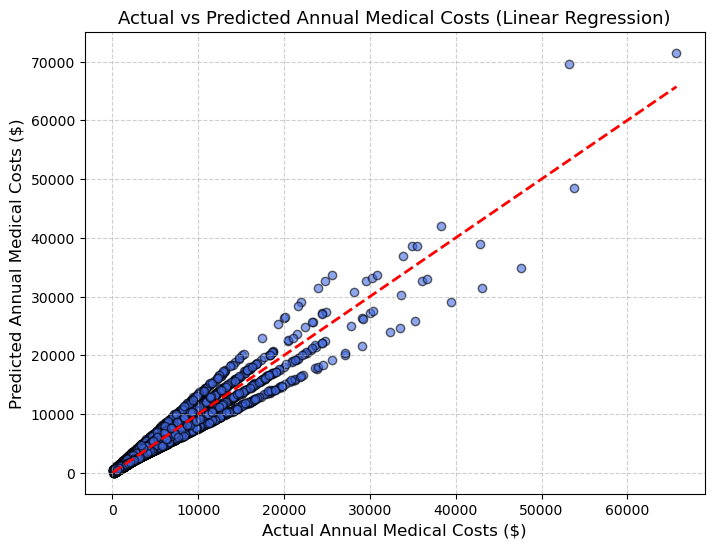

In [140]:
# ============================================================================
# 8. VISUALIZATION - ACTUAL vs PREDICTED MEDICAL COSTS
# ============================================================================

plt.figure(figsize=(8,6))
plt.scatter(y_test, lr_pred, alpha=0.6, color='royalblue', edgecolor='k')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)

plt.title("Actual vs Predicted Annual Medical Costs (Linear Regression)", fontsize=13)
plt.xlabel("Actual Annual Medical Costs ($)", fontsize=12)
plt.ylabel("Predicted Annual Medical Costs ($)", fontsize=12)
plt.grid(True, linestyle='--', alpha=0.6)

plt.show()
